># ***Deep Learning Programming Assignment - 2 (Group 28)***

>#### ***Submitted by:***
*   Keshav Garg [SE20UCSE65]
*   Soumna Nema [SE20UCAM035]
*   Khushang Zaveri [SE20UCAM017]
*   Teena Sachdeva [SE20UCSE205]


Phase 1 - Tensorflow and Keras

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np

In [19]:
#since we are using GPU
devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(devices[0], True)

In [20]:
#creating layers
#these are all hidden layers,
#with the first hidden layer knowing what shape of the input to expect
#5 Layers, using tanh as activation function(refer to assignment 1)
#layers in model are fully connected

model = Sequential([
    layers.Dense(units=25, input_shape=(4,), activation = 'tanh', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(units=10, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(units=5, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(units=1)
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                125       
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 446 (1.74 KB)
Trainable params: 446 (1.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#data pre-processing

import pandas as pd
from sklearn.model_selection import train_test_split

sheets = pd.read_excel('/content/Folds5x2_pp.xlsx', sheet_name=None)
data = pd.concat(sheets, ignore_index=True)

#final dataset
data.to_csv('/content/Data.csv', index=False)

#splitting data into 70 : 20 : 10 for training : validation : testing:


# Determine the sizes for training, validation, and test sets
total_length = len(data)
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Calculate sizes for training and validation sets
train_size = int(total_length * train_ratio)
val_size = int(total_length * val_ratio)
test_size=int(total_length*test_ratio)

# Extract a continuous chunk for the test set
test_start_index = train_size + val_size
test = data[test_start_index:]

#for shuffling
data = data.sample(frac=1).reset_index(drop=True)
# Split data into training and validation sets
train = data[:train_size]
val = data[train_size:train_size + val_size]


# Save the split datasets to new CSV files if needed
train.to_csv('train.csv', index=False)
val.to_csv('validation.csv', index=False)
test.to_csv('test.csv', index=False)

In [23]:
#for training data

# Read the original CSV file with 5 columns
train_data = pd.read_csv('/content/train.csv')
# Extract the x variable into a separate DataFrame
train_x = train_data[['AT', 'V', 'AP', 'RH']]
# Extract the y variable into a separate DataFrame
train_y = train_data[['PE']]

#for validation data

# Read the original CSV file with 5 columns
validation_data = pd.read_csv('/content/validation.csv')
# Extract the x variable into a separate DataFrame
validation_x = validation_data[['AT', 'V', 'AP', 'RH']]
# Extract the y variable into a separate DataFrame
validation_y = validation_data[['PE']]

#for test data

# Read the original CSV file with 5 columns
test_data = pd.read_csv('/content/test.csv')
# Extract the x variable into a separate DataFrame
test_x = test_data[['AT', 'V', 'AP', 'RH']]
# Extract the y variable into a separate DataFrame
test_y = test_data[['PE']]


In [24]:
#normalizing datasets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_normalized = scaler.fit_transform(train_x)
train_y_normalized = scaler.fit_transform(train_y)
validation_x_normalized = scaler.fit_transform(validation_x)
validation_y_normalized = scaler.fit_transform(validation_y)
test_x_normalized = scaler.fit_transform(test_x)
test_y_normalized = scaler.fit_transform(test_y)


In [25]:
train_x_normalized.reshape(4,33488)
train_y_normalized.reshape(1,33488)
validation_x_normalized.reshape(4,9568)
validation_y_normalized.reshape(1,9568)
test_x_normalized.reshape(4,4784)
test_y_normalized.reshape(1,4784)

array([[-1.56305562, -0.45568859,  2.08059549, ...,  0.67381413,
        -0.20171067, -0.15860433]])

In [91]:
import matplotlib.pyplot as plt

def plot_mape_vs_epochs(mape_values, epochs):
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, mape_values, label='MAPE')
    plt.xlabel('Epochs')
    plt.ylabel('MAPE')
    plt.title('Mean Absolute Percentage Error using Tensorflow vs Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


In [96]:
def MAPE(actual, predicted):
    return np.mean(np.abs(predicted - actual) / actual) * 100

In [92]:
batchSizes = [1,64,256,47840]
learningRates = [0.01,0.001,0.0001]

In [93]:
mapeDict = {}
for e in batchSizes:
  mapeDict[e] = []

Epoch 1/3
33488/33488 - 101s - loss: 0.0950 - val_loss: 0.1116 - 101s/epoch - 3ms/step
Epoch 2/3
33488/33488 - 101s - loss: 0.0956 - val_loss: 0.1790 - 101s/epoch - 3ms/step
Epoch 3/3
33488/33488 - 99s - loss: 0.0959 - val_loss: 0.1982 - 99s/epoch - 3ms/step
150/150 [==============================] - 0s 2ms/step


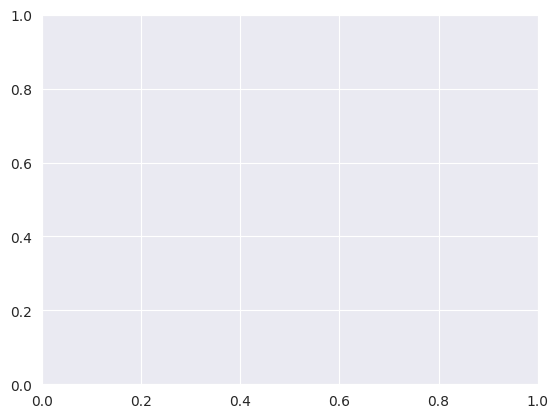

In [105]:
import matplotlib.pyplot as plt
mapeList = []
epoch = []
epochs = 3
for k in range(epochs):
      epoch.append(k)
for i in learningRates:
  for e in batchSizes:
    model.compile(optimizer=Adam(learning_rate=i), loss="mean_squared_error")
    model.fit(x=train_x_normalized, y=train_y_normalized, validation_data=(validation_x_normalized,validation_y_normalized),batch_size = e, epochs=3, verbose=2)

    #testing
    model.evaluate(test_x_normalized, test_y_normalized)


    #MAPE
    pred = model.predict(test_x_normalized)
    actual = test_y_normalized
    mape = MAPE(actual, pred)
    mapeList.append(mape)


  #finding mape and comparing with results from Project 1
  plt.plot(epoch,mapeList)
  plt.xlabel('Number of Epochs')
  plt.ylabel('MAPE (%) using tanh as Activation Function')
  plt.title('MAPE per Batch Epoch - Using TensorFlow and Keras')
  plt.show()
  print("Learning Rate:", end="")
  print(i)
  print("Batch Size:", end="")
  print(e)
  mapeList = []
  epoch = []


In [100]:
  # plt.plot(np.array(epoch).reshape(1,-1), np.array(mapeList).reshape(1,-1))
  # plt.xlabel('Number of Epochs')
  # plt.ylabel('MAPE (%) using tanh as Activation Function')
  # plt.title('MAPE per Batch Epoch - Using TensorFlow and Keras')
  # plt.show()
  # print("Learning Rate:", end="")
  # print(i)
  # print("Batch Size:", end="")
  # print(e)
  # print("")
  # mapeList = []

  mapeList

[5.384121445045871]

In [103]:
epoch

[]

Phase 2 - Machine Translation

In [106]:
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# split a loaded document into sentences
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t') for line in  lines]
	return pairs

# clean a list of lines
def clean_pairs(lines):
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for pair in lines:
		clean_pair = list()
		for line in pair:
			# normalize unicode characters
			line = normalize('NFD', line).encode('ascii', 'ignore')
			line = line.decode('UTF-8')
			# tokenize on white space
			line = line.split()
			# convert to lowercase
			line = [word.lower() for word in line]
			# remove punctuation from each token
			line = [word.translate(table) for word in line]
			# remove non-printable chars form each token
			line = [re_print.sub('', w) for w in line]
			# remove tokens with numbers in them
			line = [word for word in line if word.isalpha()]
			# store as string
			clean_pair.append(' '.join(line))
		cleaned.append(clean_pair)
	return array(cleaned)

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
filename = 'deu.txt'
doc = load_doc(filename)
# split into english-german pairs
pairs = to_pairs(doc)
# clean sentences
clean_pairs = clean_pairs(pairs)
# save clean pairs to file
save_clean_data(clean_pairs, 'english-german.pkl')
# spot check
for i in range(100):
	print('[%s] => [%s]' % (clean_pairs[i,0], clean_pairs[i,1]))

Saved: english-german.pkl
[hi] => [hallo]
[hi] => [gru gott]
[run] => [lauf]
[wow] => [potzdonner]
[wow] => [donnerwetter]
[fire] => [feuer]
[help] => [hilfe]
[help] => [zu hulf]
[stop] => [stopp]
[wait] => [warte]
[hello] => [hallo]
[i try] => [ich probiere es]
[i won] => [ich hab gewonnen]
[i won] => [ich habe gewonnen]
[smile] => [lacheln]
[cheers] => [zum wohl]
[freeze] => [keine bewegung]
[freeze] => [stehenbleiben]
[got it] => [verstanden]
[got it] => [einverstanden]
[he ran] => [er rannte]
[he ran] => [er lief]
[hop in] => [mach mit]
[hug me] => [druck mich]
[hug me] => [nimm mich in den arm]
[hug me] => [umarme mich]
[i fell] => [ich fiel]
[i fell] => [ich fiel hin]
[i fell] => [ich sturzte]
[i fell] => [ich bin hingefallen]
[i fell] => [ich bin gesturzt]
[i know] => [ich wei]
[i lied] => [ich habe gelogen]
[i lost] => [ich habe verloren]
[im] => [ich bin jahre alt]
[im] => [ich bin]
[im ok] => [mir gehts gut]
[im ok] => [es geht mir gut]
[no way] => [unmoglich]
[no way] => [da

In [107]:
from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
raw_dataset = load_clean_sentences('english-german.pkl')

# reduce dataset size
n_sentences = 10000
dataset = raw_dataset[:n_sentences, :]
# random shuffle
shuffle(dataset)
# split into train/test
train, test = dataset[:9000], dataset[9000:]
# save
save_clean_data(dataset, 'english-german-both.pkl')
save_clean_data(train, 'english-german-train.pkl')
save_clean_data(test, 'english-german-test.pkl')

Saved: english-german-both.pkl
Saved: english-german-train.pkl
Saved: english-german-test.pkl


In [109]:
import tensorflow as tf
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint

def load_clean_sentences(filename):
    return load(open(filename,'rb'))

dataset=load_clean_sentences('english-german-both.pkl')
train=load_clean_sentences('english-german-train.pkl')
test=load_clean_sentences('english-german-test.pkl')

def create_tokenizer(lines):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer


def max_length(lines):
	return max(len(line.split()) for line in lines)


eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))

ger_tokenizer = create_tokenizer(dataset[:, 1])
ger_vocab_size = len(ger_tokenizer.word_index) + 1
ger_length = max_length(dataset[:, 1])
print('German Vocabulary Size: %d' % ger_vocab_size)
print('German Max Length: %d' % (ger_length))

def encode_sequences(tokenizer, length, lines):
	X = tokenizer.texts_to_sequences(lines)
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

def encode_output(sequences, vocab_size):
	ylist = list()
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		ylist.append(encoded)
	y = array(ylist)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y



trainX = encode_sequences(ger_tokenizer, ger_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)

testX = encode_sequences(ger_tokenizer, ger_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)

def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
	model.add(LSTM(n_units))
	model.add(RepeatVector(tar_timesteps))
	model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model


model = define_model(ger_vocab_size, eng_vocab_size, ger_length, eng_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')

print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)


filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
print(len(trainX))
model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2)

English Vocabulary Size: 2403
English Max Length: 5
German Vocabulary Size: 3862
German Max Length: 10
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 256)           988672    
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 256)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 5, 256)            525312    
                                                                 
 time_distributed (TimeDist  (None, 5, 2403)           617571    
 ributed)                                                        
                 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 3.67718 to 3.54192, saving model to model.h5
141/141 - 2s - loss: 3.5444 - val_loss: 3.5419 - 2s/epoch - 17ms/step
Epoch 3/30

Epoch 3: val_loss improved from 3.54192 to 3.46599, saving model to model.h5
141/141 - 2s - loss: 3.4040 - val_loss: 3.4660 - 2s/epoch - 13ms/step
Epoch 4/30

Epoch 4: val_loss improved from 3.46599 to 3.35916, saving model to model.h5
141/141 - 2s - loss: 3.2598 - val_loss: 3.3592 - 2s/epoch - 14ms/step
Epoch 5/30

Epoch 5: val_loss improved from 3.35916 to 3.27665, saving model to model.h5
141/141 - 2s - loss: 3.1223 - val_loss: 3.2767 - 2s/epoch - 12ms/step
Epoch 6/30

Epoch 6: val_loss improved from 3.27665 to 3.18628, saving model to model.h5
141/141 - 2s - loss: 2.9981 - val_loss: 3.1863 - 2s/epoch - 11ms/step
Epoch 7/30

Epoch 7: val_loss improved from 3.18628 to 3.08420, saving model to model.h5
141/141 - 3s - loss: 2.8460 - val_loss: 3.0842 - 3s/epoch - 19ms/step
Epoch 8/30

Epoch 8: val_loss improved from 3.08420 to 2.

In [110]:
from pickle import load
from numpy import array
from numpy import argmax
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('english-german-both.pkl')
train = load_clean_sentences('english-german-train.pkl')
test = load_clean_sentences('english-german-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
ger_tokenizer = create_tokenizer(dataset[:, 1])
ger_vocab_size = len(ger_tokenizer.word_index) + 1
ger_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(ger_tokenizer, ger_length, train[:, 1])
testX = encode_sequences(ger_tokenizer, ger_length, test[:, 1])

# load model
model = load_model('model.h5')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)

train
src=[ich fuhle deinen schmerz], target=[i feel your pain], predicted=[i feel your]
src=[ich hab sie verbrannt], target=[i burned them], predicted=[i burned you]
src=[hat es euch freude gemacht], target=[did you enjoy it], predicted=[did you enjoy it]
src=[verklagen wir tom], target=[lets sue tom], predicted=[lets sue tom]
src=[ich liebe ihren sohn], target=[i love your son], predicted=[i love your son]
src=[wir sind viel gelaufen], target=[we walked a lot], predicted=[we have a lot]
src=[tom kennt uns], target=[tom knows us], predicted=[tom knows us]
src=[sei nicht so schuchtern], target=[dont be shy], predicted=[dont be so shy]
src=[tom hat eine waffe], target=[tom has a gun], predicted=[tom has a gun]
src=[wie romantisch], target=[how romantic], predicted=[how romantic]
BLEU-1: 0.827482
BLEU-2: 0.758537
BLEU-3: 0.673482
BLEU-4: 0.425225
test
src=[sie gab ihm eine ohrfeige], target=[she slapped him], predicted=[she shot a bear]
src=[ihr wart tapfer], target=[you were brave], pre